In [27]:
import matplotlib.pyplot as plt
from src.features.build_features import create_patches_from_imgs, retrieve_from_patches
from src.visualization.visualize import show_images
from src.data.io import get_images
import cv2

In [35]:
raw_data_path = '/Users/beantown/PycharmProjects/master-thesis/data/raw/'

matplot = True

scale = 0.25

In [8]:
create_patches_from_imgs(input_path=raw_data_path,
                         output_path='/Users/beantown/PycharmProjects/master-thesis/data/processed/',
                         n=4,
                         gradients=True)


Read info from /Users/beantown/PycharmProjects/master-thesis/data/raw/info_file.csv ...
['Constellation-Papyri-PB1-homer-1072205286_008', 'Bodleian-Library-MS-Gr-class-a-8-P_00019_verso', 'Bodleian-Library-MS-Gr-class-a-8-P_00002_section-2-recto', 'Bodleian-Library-MS-Gr-class-a-8-P_00013_section-4-verso', 'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00009_frame-9', 'Constellation-Papyri-PB1-homer-1072205286_011', 'Constellation-Papyri-PB1-homer-1072205286_013', 'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00002_frame-2', 'Bodleian-Library-MS-Gr-class-a-8-P_00005_section-5-recto', 'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00006_frame-6', 'Constellation-Papyri-PB1-homer-1072205286_017', 'Bodleian-Library-MS-Gr-class-a-8-P_00003_section-3-recto', 'Bodleian-Library-MS-Gr-class-a-8-P_00004_section-4-recto', 'Constellation-Papyri-PB1-homer-1072205286_015', 'Bodleian-Library-MS-Gr-class-a-8-P_00008_recto', 'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00010_frame-10', 'Constellation-Papyri-PB1-homer-1072

In [ ]:
create_patches_from_imgs(input_path=raw_data_path,
                         output_path='/Users/beantown/PycharmProjects/master-thesis/data/processed/',
                         n=4,
                         gradients=False)


Read info from /Users/beantown/PycharmProjects/master-thesis/data/processed/8_gradient_patches/info_file.csv ...

Read info from /Users/beantown/PycharmProjects/master-thesis/data/processed/8_gradient_patches/info_file.csv ...

File Info

|   Unnamed: 0 | names                                                         |   widths |   heights |   labels |
|--------------|---------------------------------------------------------------|----------|-----------|----------|
|           92 | Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_x |     2672 |      1588 |        1 |
|          175 | Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_y |     2672 |      1588 |        1 |


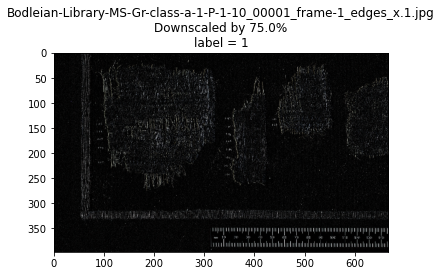

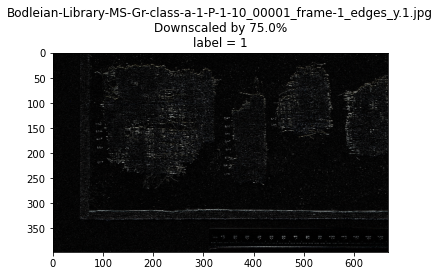

In [18]:
files = ['Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_x',
         'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_y']
info = show_images(raw_data_path='/Users/beantown/PycharmProjects/master-thesis/data/processed/8_gradient_patches/',
                   all=False,
                   file_names=files,
                   rand=False,
                   scaler=scale,
                   print_info=True,
                   print_overview=False,
                   matplot=matplot,
                   label=1)

In [19]:
files = ['Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_x',
         'Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1_edges_y']
gradient_images = get_images(raw_data_path='/Users/beantown/PycharmProjects/master-thesis/data/processed/8_gradient_patches/',
                    file_names=files,
                    rand=False,
                    scaler=scale,
                    print_info=False,
                    print_overview=False,
                    label=1)


Read info from /Users/beantown/PycharmProjects/master-thesis/data/processed/8_gradient_patches/info_file.csv ...


In [20]:
print(len(gradient_images))

2


In [21]:
files = ['Bodleian-Library-MS-Gr-class-a-1-P-1-10_00001_frame-1']
patched_images = get_images(raw_data_path='/Users/beantown/PycharmProjects/master-thesis/data/processed/8_patches/',
                            file_names=files,
                            rand=False,
                            scaler=scale,
                            print_info=False,
                            print_overview=False,
                            label=1)


Read info from /Users/beantown/PycharmProjects/master-thesis/data/processed/8_patches/info_file.csv ...


In [37]:
test_img_vertical = patched_images - gradient_images[0]
test_img_horizontal = patched_images - gradient_images[1]
test_img = (patched_images - gradient_images[0]) - gradient_images[1]

if matplot:
    test_img_vertical = cv2.cvtColor(test_img_vertical[0], cv2.COLOR_BGR2RGB)
    test_img_horizontal = cv2.cvtColor(test_img_horizontal[0], cv2.COLOR_BGR2RGB)
    test_img = cv2.cvtColor(test_img[0], cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.title('Img without vertical edges.')
    plt.imshow(test_img_vertical)
    plt.show()
    plt.figure()
    plt.title('Img without horizontal edges.')
    plt.imshow(test_img_horizontal)
    plt.show()
    plt.figure()
    plt.title('Img without both edges.')
    plt.imshow(test_img)
    plt.show()
else:
    cv2.imshow('Img without vertical edges.', test_img_vertical[0])
    cv2.imshow('Img without horizontal edges.', test_img_horizontal[0])
    cv2.imshow('Img without both edges.', test_img[0])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
